In [ ]:
!pip install chart-studio


In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
# from sklearn.metrics.pairwise import euclidean_distance
import pandas as pd
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from chart_studio.plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
import seaborn as sns

In [3]:
from google.colab import files
upload = files.upload()

Saving nba_2013.csv to nba_2013.csv


In [31]:
data = pd.read_csv('nba_2013.csv')

In [5]:
data.head(5)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013


In [6]:
data.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [7]:
data.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

## Handling Null Values

In [8]:
data['fg.'] = data['fg.'].fillna(data['fg.'].median())

In [9]:
data['x3p.'] = data['x3p.'].fillna(data['fg.'].median())

In [10]:

data['ft.'] = data['ft.'].fillna(data['ft.'].median())

In [11]:
data['x2p.'] = data['x2p.'].fillna(data['x2p.'].median())

In [12]:
data['efg.'] = data['efg.'].fillna(data['efg.'].median())

## Splitting Data



*   Here we are dropping catagorical features like pos,player,bref_team_id as knn works well with numerical feature, but we can use catagorical data by using one hot encoding etc bu for simplicity we are using only numerical feature for model building.




In [13]:
data = data.drop(['pos','bref_team_id','season','season_end','player'],axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



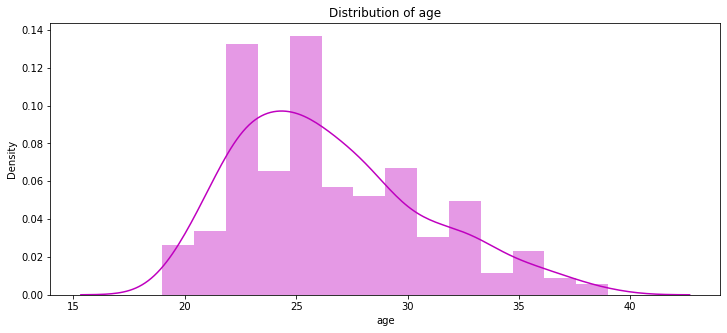

In [14]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'm')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



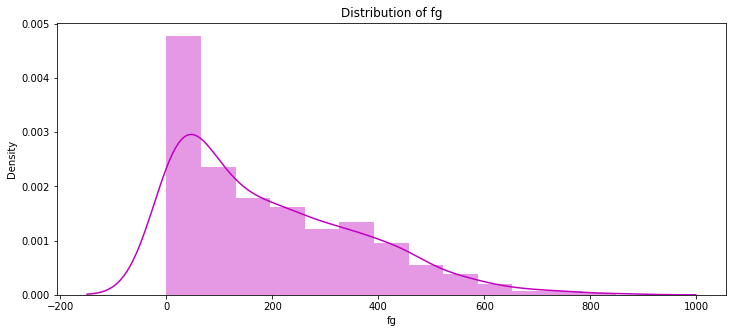

In [29]:
plt.figure(figsize=(12,5))
plt.title("Distribution of fg")
ax = sns.distplot(data["fg"], color = 'm')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



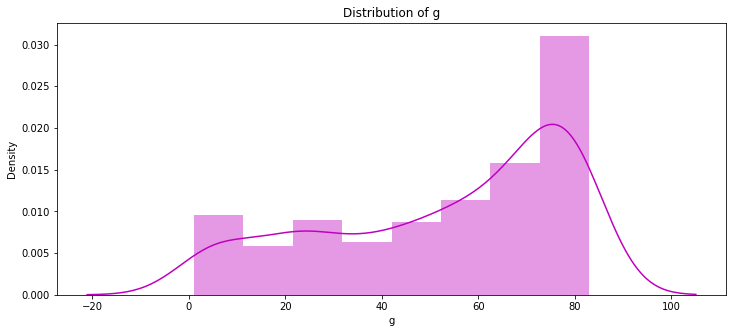

In [30]:
plt.figure(figsize=(12,5))
plt.title("Distribution of g")
ax = sns.distplot(data["g"], color = 'm')

As we can see from above all data have different distribution hence we need to scale the feature

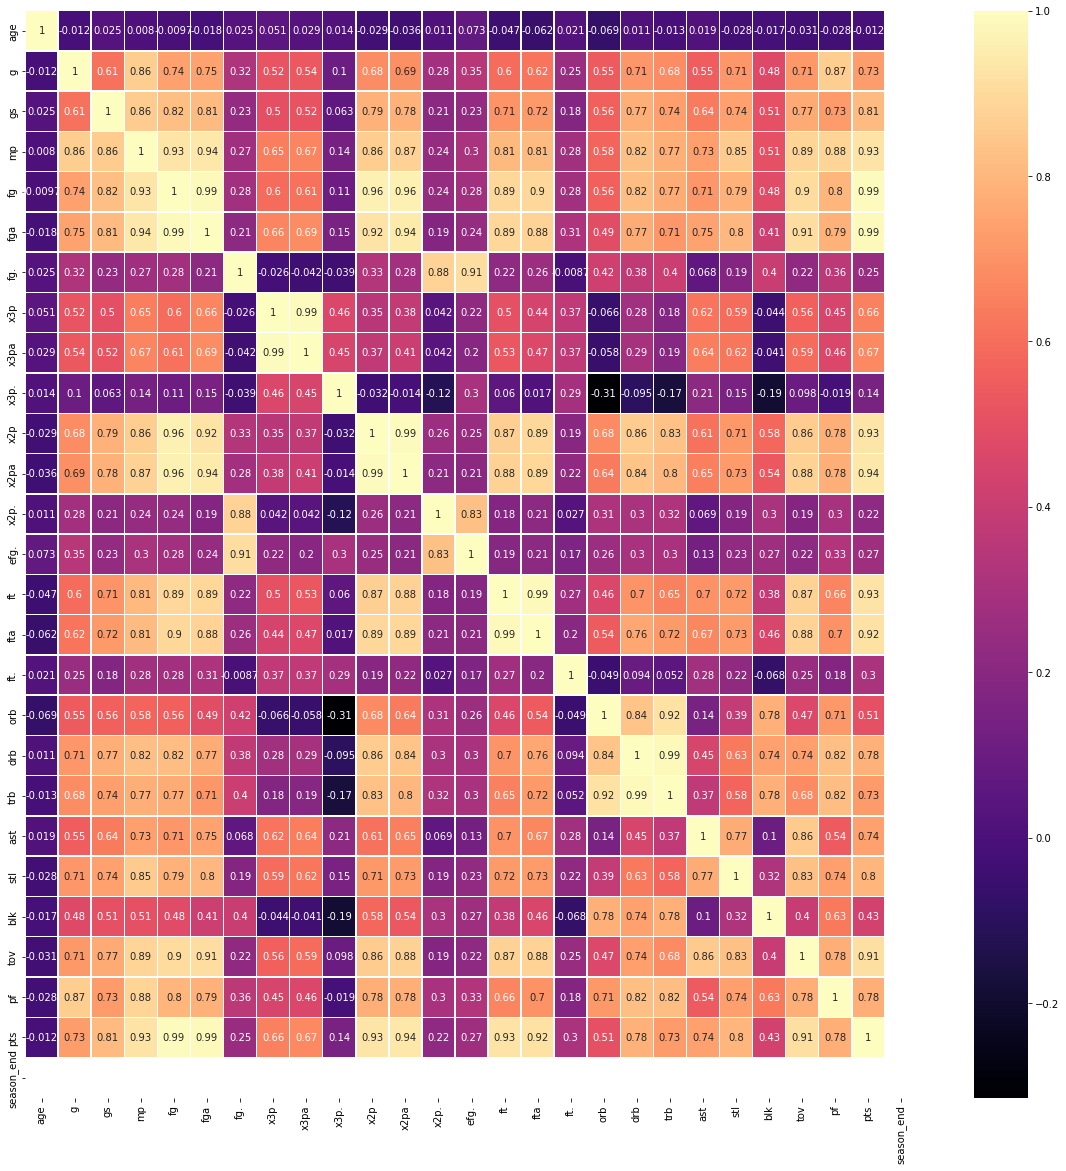

In [32]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(data.corr(),annot=True,cmap='magma', linewidths=.5, ax=ax)

In [17]:
data.columns

Index(['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.',
       'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb',
       'ast', 'stl', 'blk', 'tov', 'pf', 'pts'],
      dtype='object')

In [18]:
X = data.drop(['pts'],axis=1)
y = data['pts']

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)

In [20]:
print('X_train Shape:',X_train.shape,'y_train shape',y_train.shape)
print('X_test Shape:',X_test.shape,'y_test shape',y_test.shape)


X_train Shape: (322, 25) y_train shape (322,)
X_test Shape: (159, 25) y_test shape (159,)


## Preprocessing Data- Scalling the features

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler(feature_range=(0,1))

X_train_scale = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scale)

X_test_scale = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scale)

In [23]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,0.05,0.975610,0.243902,0.383211,0.109541,0.109597,0.503,0.000000,0.000000,0.438000,0.131728,0.131392,0.502703,0.503,0.112376,0.168944,0.581,0.429003,0.242656,0.298025,0.061080,0.209424,0.280788,0.241497,0.749077
1,0.50,0.804878,0.817073,0.566485,0.276796,0.222156,0.627,0.000000,0.000000,0.438000,0.332861,0.266335,0.626667,0.627,0.031294,0.079503,0.344,0.549849,0.624521,0.602334,0.159091,0.246073,0.596059,0.329932,0.774908
2,0.85,0.963415,0.012195,0.179750,0.063604,0.074645,0.429,0.000000,0.000000,0.438000,0.076487,0.089489,0.428571,0.429,0.022760,0.037267,0.533,0.199396,0.139208,0.157092,0.028409,0.073298,0.147783,0.125850,0.284133
3,0.10,0.243902,0.000000,0.024992,0.005889,0.007109,0.417,0.003831,0.001626,1.000000,0.005666,0.007812,0.363636,0.458,0.015647,0.023602,0.579,0.045317,0.014049,0.023339,0.002841,0.031414,0.014778,0.013605,0.033210
4,0.40,0.914634,0.926829,0.779558,0.320377,0.364929,0.442,0.363985,0.422764,0.365385,0.250708,0.252841,0.497191,0.519,0.201991,0.218634,0.807,0.160121,0.293742,0.254039,0.376420,0.392670,0.113300,0.312925,0.583026


## Hyperparameter Tunning

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
import math

Score: 0.8899111653749155 for k: 1
Score: 0.9441186820278177 for k: 2
Score: 0.9534817796796176 for k: 3
Score: 0.9539842834972574 for k: 4
Score: 0.9599940631796577 for k: 5
Score: 0.960735382870133 for k: 6
Score: 0.9624702203440073 for k: 7
Score: 0.9599701769474901 for k: 8
Score: 0.9578596036017454 for k: 9
Score: 0.9584910890694934 for k: 10
Score: 0.9590214194522437 for k: 11
Score: 0.9597417257859158 for k: 12
Score: 0.9583270849073606 for k: 13
Score: 0.9582978467368785 for k: 14
Score: 0.9584875365396291 for k: 15
Score: 0.9556893518454841 for k: 16
Score: 0.9545099061754132 for k: 17
Score: 0.9542363541409732 for k: 18
Score: 0.9541521025966251 for k: 19
Score: 0.9541907072505523 for k: 20
Score: 0.9542730785231048 for k: 21
Score: 0.9530625619647733 for k: 22
Score: 0.9525828574343396 for k: 23
Score: 0.9508824224551843 for k: 24
Score: 0.9497465320966091 for k: 25


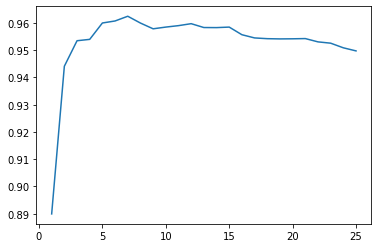

In [25]:
k_range = list(range(1, 26))
scores = []

for i in k_range:
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
  
    y_pred = knn.predict(X_test)
    scores.append(metrics.r2_score(y_test, y_pred))
   

    print('Score:',metrics.r2_score(y_test, y_pred),'for k:',i)
plt.plot(k_range, scores)


plt.show()

### Observation

*   From the above plot we can see we are getting best score at K=6
*   We train model on K=6 to predict value for test



In [43]:
model = KNeighborsRegressor(n_neighbors=6)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
error = math.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(error)
print("Regression score is:",format(metrics.r2_score(y_test, y_pred),'.4f'))

94.16767684658807
Regression score is: 0.9607


## Plot Actual values of Y Vs Predicted values Y

Text(0, 0.5, 'Prediction')

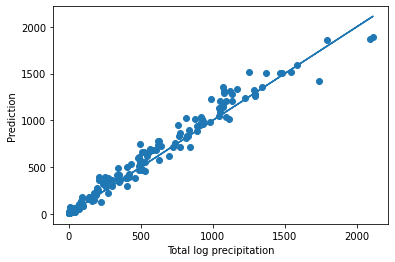

In [44]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(y_test, y_pred)
ax.plot(y_test, y_test)
ax.set_xlabel("Total log precipitation")
ax.set_ylabel("Prediction")

## Final Observation



1.   I  analyse the data in which I  found data point have different distribution so I  need to scale it.

2.   After analysis I found there are some missing values too so I replace mising value with median of feature. 

3.   I  get correlation matrix but there is nothing conclusive which feature to drop so I just kept all features as it is.

3.   After that I preprocessed data and scale them using MINMAX_SCALER
and split data into test and train set.

4.   After Preprocessing I tried to fing the best value of k for KNeighborsRegressor by using hyperparameter tunning and found best value of K as 6.

5.  Finally I trained model on k=6 and get accuracy of 0.9607 and MSE = 94.168

